# Modelling for Madugital
Madugital is a company that sells honey online. One day, Madugital's CRM Manager wanted to know which customers had the greatest potential to buy their products based on their activities on the website, so that Madugital could contact these customers more quickly with the right treatment.

The Madugital company has a lead collection in the form of filled in forms from several customers who access their website through various marketing channels. From this data, there are some customers who buy the product and some who don't, this is recorded in the 'converted' column.

# 1. Data Collection

Import Packages

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import accuracy_score, precision_score, recall_score

Loading Dataset and Viewing Data

In [2]:
df=pd.read_csv("Data Madugital.csv")

In [3]:
# shape of dataset
df.shape

(9240, 37)

In [4]:
# summary of the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                          Non-Null Count  Dtype  
---  ------                                          --------------  -----  
 0   Prospect ID                                     9240 non-null   object 
 1   Lead Number                                     9240 non-null   int64  
 2   Lead Origin                                     9240 non-null   object 
 3   Lead Source                                     9204 non-null   object 
 4   Do Not Email                                    9240 non-null   object 
 5   Do Not Call                                     9240 non-null   object 
 6   Converted                                       9240 non-null   int64  
 7   TotalVisits                                     9103 non-null   float64
 8   Total Time Spent on Website                     9240 non-null   int64  
 9   Page Views Per Visit                     

In [5]:
# first 5 records of dataset
df.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,...,No,Potential Lead,Jakarta,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,...,No,Select,Jakarta,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,...,No,Select,Jakarta,02.Medium,01.High,15.0,18.0,No,No,Modified


# 2. Data Preparation

We can check the unique values of all the features.

In [6]:
for i in df.columns:
    print('\033[1m', i, 'unique values:\033[0m', df[i].unique(), '\n')

 Prospect ID unique values: ['7927b2df-8bba-4d29-b9a2-b6e0beafe620'
 '2a272436-5132-4136-86fa-dcc88c88f482'
 '8cc8c611-a219-4f35-ad23-fdfd2656bd8a' ...
 'aac550fe-a586-452d-8d3c-f1b62c94e02c'
 '5330a7d1-2f2b-4df4-85d6-64ca2f6b95b9'
 '571b5c8e-a5b2-4d57-8574-f2ffb06fdeff'] 

 Lead Number unique values: [660737 660728 660727 ... 579545 579538 579533] 

 Lead Origin unique values: ['API' 'Landing Page Submission' 'Lead Add Form' 'Lead Import'
 'Quick Add Form'] 

 Lead Source unique values: ['Olark Chat' 'Organic Search' 'Direct Traffic' 'Google' 'Referral Sites'
 'Welingak Website' 'Reference' 'google' 'Facebook' nan 'blog'
 'Pay per Click Ads' 'bing' 'Social Media' 'WeLearn' 'Click2call'
 'Live Chat' 'welearnblog_Home' 'youtubechannel' 'testone' 'Press_Release'
 'NC_EDM'] 

 Do Not Email unique values: ['No' 'Yes'] 

 Do Not Call unique values: ['No' 'Yes'] 

 Converted unique values: [0 1] 

 TotalVisits unique values: [  0.   5.   2.   1.   4.   8.  11.   6.   3.   7.  13.  17.  nan  

Check if there's duplicated data.

In [7]:
df.loc[df['Prospect ID'].duplicated()]

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity


In [8]:
df.duplicated().sum()

0

Drop unnecessary features that we don't really need

In [9]:
df_fill=df.copy()

In [10]:
df_fill.drop(['Prospect ID','Lead Number','Last Activity','Magazine','Receive More Updates About Our Products',
              'Update me on Supply Chain Content','Get updates on DM Content','City','I agree to pay the amount through cheque',
              'A free copy of Mastering The Interview'],inplace=True,axis=1) 

Rename some of the features for more simple name

In [11]:
df_fill.rename(columns={'TotalVisits':'Total Visits','Total Time Spent on Website':'Total Time',
                        'Page Views Per Visit':'Page Views','How did you hear about Madugital':'Hear about Madugital',
                        'What is your current occupation':'Current Occupation',
                        'What matters most to you in choosing a product':'Choosing Product',
                        'Through Recommendations':'Recommendations','Asymmetrique Activity Score':'Activity Score',
                        'Asymmetrique Profile Score':'Profile Score','Asymmetrique Activity Index':'Activity Index',
                        'Asymmetrique Profile Index':'Profile Index'},inplace=True)

In the column 'Lead Source' some of the source is the same as the other (example: 'google' is the same as 'Google'), we should fix it.

In [12]:
df_fill['Lead Source']=df_fill['Lead Source'].replace('google','Google')
df_fill['Lead Source']=df_fill['Lead Source'].replace('Facebook','Social Media')
df_fill['Lead Source']=df_fill['Lead Source'].replace('welearnblog_Home','blog')

We also need to fix some other misspelling.

In [13]:
df_fill['Country']=df_fill['Country'].replace('unknown','Unknown')
df_fill['Specialization']=df_fill['Specialization'].replace('Select','Unknown')
df_fill['Hear about Madugital']=df_fill['Hear about Madugital'].replace('Select','Unknown')
df_fill['Lead Profile']=df_fill['Lead Profile'].replace('Select','Unknown')

Check the missing values of all the features.

In [14]:
df_fill.isnull().sum()

Lead Origin                 0
Lead Source                36
Do Not Email                0
Do Not Call                 0
Converted                   0
Total Visits              137
Total Time                  0
Page Views                137
Country                  2461
Specialization           1438
Hear about Madugital     2207
Current Occupation       2690
Choosing Product         2709
Search                      0
Newspaper Article           0
Madugital Telegram          0
Newspaper                   0
Digital Advertisement       0
Recommendations             0
Tags                     3353
Lead Quality             4767
Lead Profile             2709
Activity Index           4218
Profile Index            4218
Activity Score           4218
Profile Score            4218
Last Notable Activity       0
dtype: int64

Fill the missing value of the categorical features with 'Unknown'.

In [15]:
categorical = ['Lead Source','Country','Current Occupation','Choosing Product','Tags','Lead Quality','Activity Index',
               'Profile Index','Specialization','Hear about Madugital','Lead Profile']

for col in categorical:
    df_fill[col]=df_fill[col].fillna('Unknown')

Fill the missing value of the numerical features with their means.

In [16]:
numerical = ['Total Visits','Page Views','Activity Score','Profile Score']

for col in numerical:
    df_fill[col]=df_fill[col].fillna(df_fill[col].mean())

In [17]:
df_fill.isnull().sum()

Lead Origin              0
Lead Source              0
Do Not Email             0
Do Not Call              0
Converted                0
Total Visits             0
Total Time               0
Page Views               0
Country                  0
Specialization           0
Hear about Madugital     0
Current Occupation       0
Choosing Product         0
Search                   0
Newspaper Article        0
Madugital Telegram       0
Newspaper                0
Digital Advertisement    0
Recommendations          0
Tags                     0
Lead Quality             0
Lead Profile             0
Activity Index           0
Profile Index            0
Activity Score           0
Profile Score            0
Last Notable Activity    0
dtype: int64

The related variables or columns now have been filled and the unnecessary one have been dropped

# 3. Exploratory Data Analysis

Calculating the correlation the numerical features.

C:\Users\Personal\AppData\Local\Temp\ipykernel_12872\3986747246.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df_fill.corr(), ax=ax, annot=True)


<Axes: >

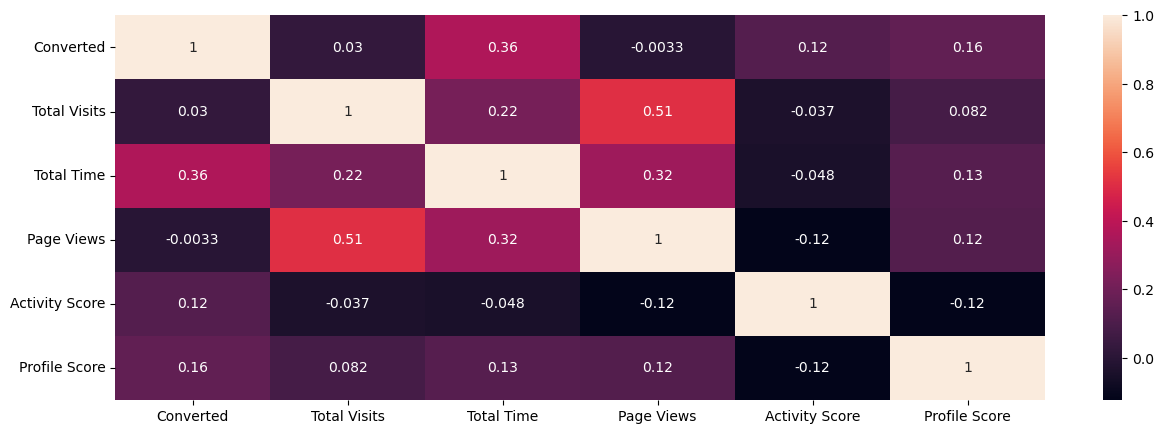

In [18]:
fig, ax = plt.subplots(figsize=(15, 5))
sns.heatmap(df_fill.corr(), ax=ax, annot=True)

Create a pie chart of the converted percentage.

In [19]:
df_fill['Converted'].value_counts(dropna = False)

0    5679
1    3561
Name: Converted, dtype: int64

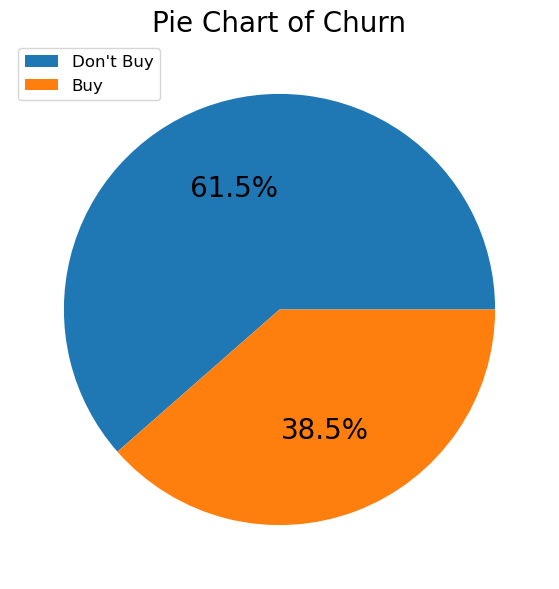

In [20]:
plt.figure(figsize=(10, 7))
label=["Don't Buy","Buy"]
plt.pie(df_fill['Converted'].value_counts(dropna = False), autopct='%1.1f%%', textprops={'fontsize': 20})
plt.title('Pie Chart of Converted',fontsize="20")
plt.legend(label, loc ="upper left", fontsize="12")
plt.show() 

Create a 'converted' bar graph based on the categorical features.

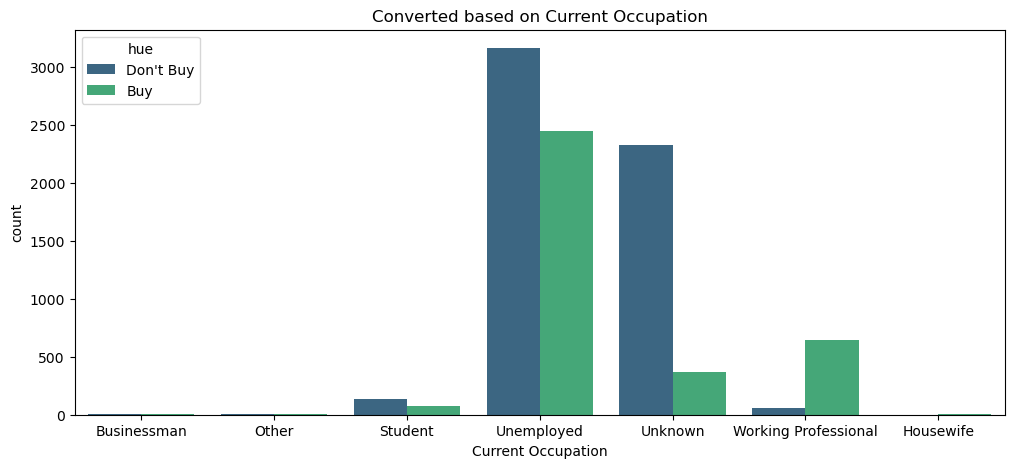

In [21]:
col='Current Occupation'

data1 = df_fill[df_fill["Converted"] == 0]
data2 = df_fill[df_fill["Converted"] == 1]

df1 = data1[col].value_counts().reset_index()
df1 = df1.rename(columns = {col : 'count', 'index' : col})
df1 = df1.sort_values(col)

df2 = data2[col].value_counts().reset_index()
df2 = df2.rename(columns = {col : 'count', 'index' : col})
df2 = df2.sort_values(col)

df1['hue']="Don't Buy"
df2['hue']="Buy"
combine=pd.concat([df1,df2])

plt.figure(figsize=(12, 5))
sns.barplot(x=col,y='count',data=combine,hue='hue', palette="viridis")
plt.title("Converted based on Current Occupation")
plt.show()

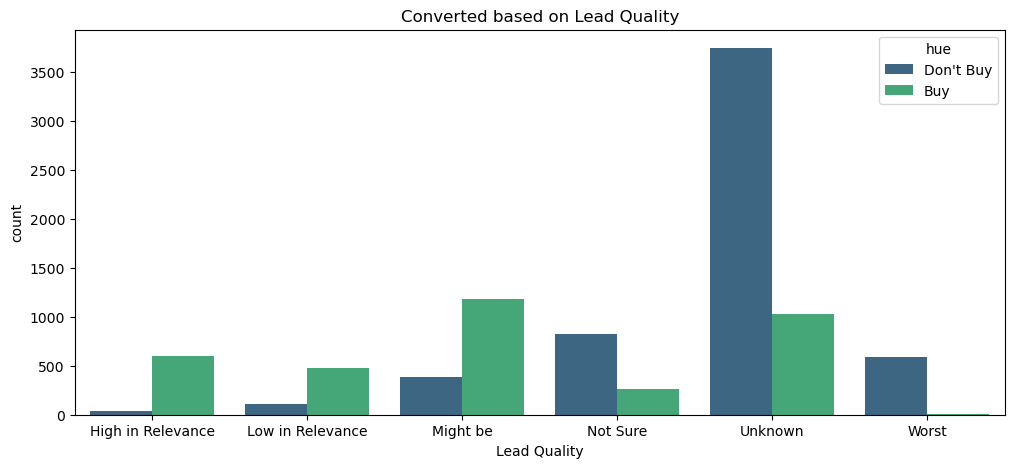

In [22]:
col='Lead Quality'

data1 = df_fill[df_fill["Converted"] == 0]
data2 = df_fill[df_fill["Converted"] == 1]

df1 = data1[col].value_counts().reset_index()
df1 = df1.rename(columns = {col : 'count', 'index' : col})
df1 = df1.sort_values(col)

df2 = data2[col].value_counts().reset_index()
df2 = df2.rename(columns = {col : 'count', 'index' : col})
df2 = df2.sort_values(col)

df1['hue']="Don't Buy"
df2['hue']="Buy"
combine=pd.concat([df1,df2])

plt.figure(figsize=(12, 5))
sns.barplot(x=col,y='count',data=combine,hue='hue', palette="viridis")
plt.title("Converted based on Lead Quality")
plt.show()

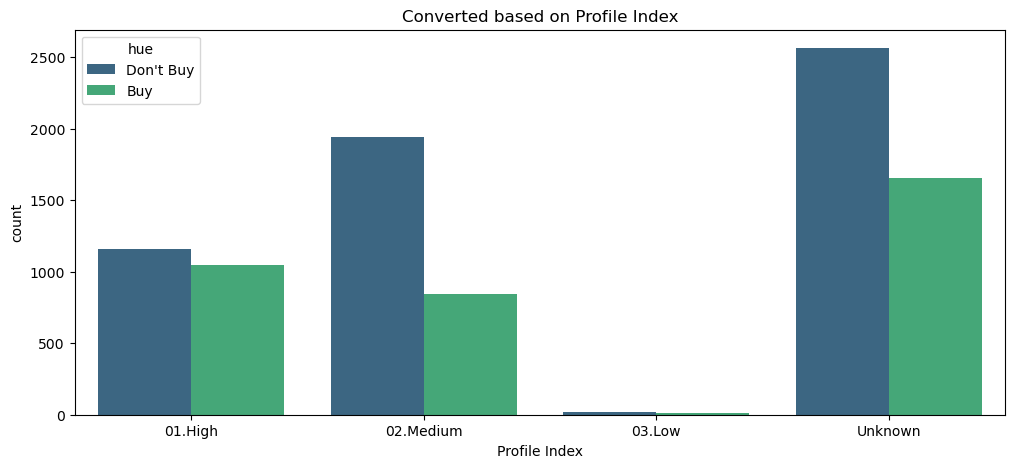

In [23]:
col='Profile Index'

data1 = df_fill[df_fill["Converted"] == 0]
data2 = df_fill[df_fill["Converted"] == 1]

df1 = data1[col].value_counts().reset_index()
df1 = df1.rename(columns = {col : 'count', 'index' : col})
df1 = df1.sort_values(col)

df2 = data2[col].value_counts().reset_index()
df2 = df2.rename(columns = {col : 'count', 'index' : col})
df2 = df2.sort_values(col)

df1['hue']="Don't Buy"
df2['hue']="Buy"
combine=pd.concat([df1,df2])

plt.figure(figsize=(12, 5))
sns.barplot(x=col,y='count',data=combine,hue='hue', palette="viridis")
plt.title("Converted based on Profile Index")
plt.show()

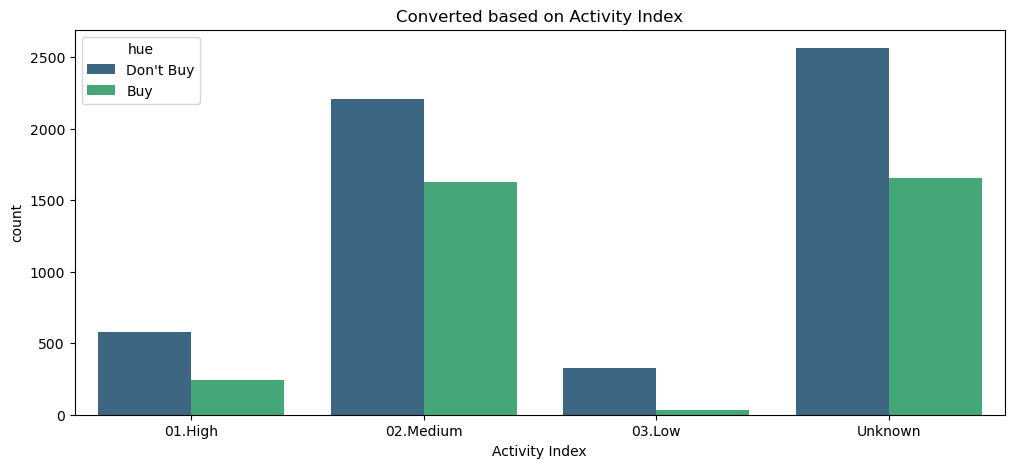

In [24]:
col='Activity Index'

data1 = df_fill[df_fill["Converted"] == 0]
data2 = df_fill[df_fill["Converted"] == 1]

df1 = data1[col].value_counts().reset_index()
df1 = df1.rename(columns = {col : 'count', 'index' : col})
df1 = df1.sort_values(col)

df2 = data2[col].value_counts().reset_index()
df2 = df2.rename(columns = {col : 'count', 'index' : col})
df2 = df2.sort_values(col)

df1['hue']="Don't Buy"
df2['hue']="Buy"
combine=pd.concat([df1,df2])

plt.figure(figsize=(12, 5))
sns.barplot(x=col,y='count',data=combine,hue='hue', palette="viridis")
plt.title("Converted based on Activity Index")
plt.show()

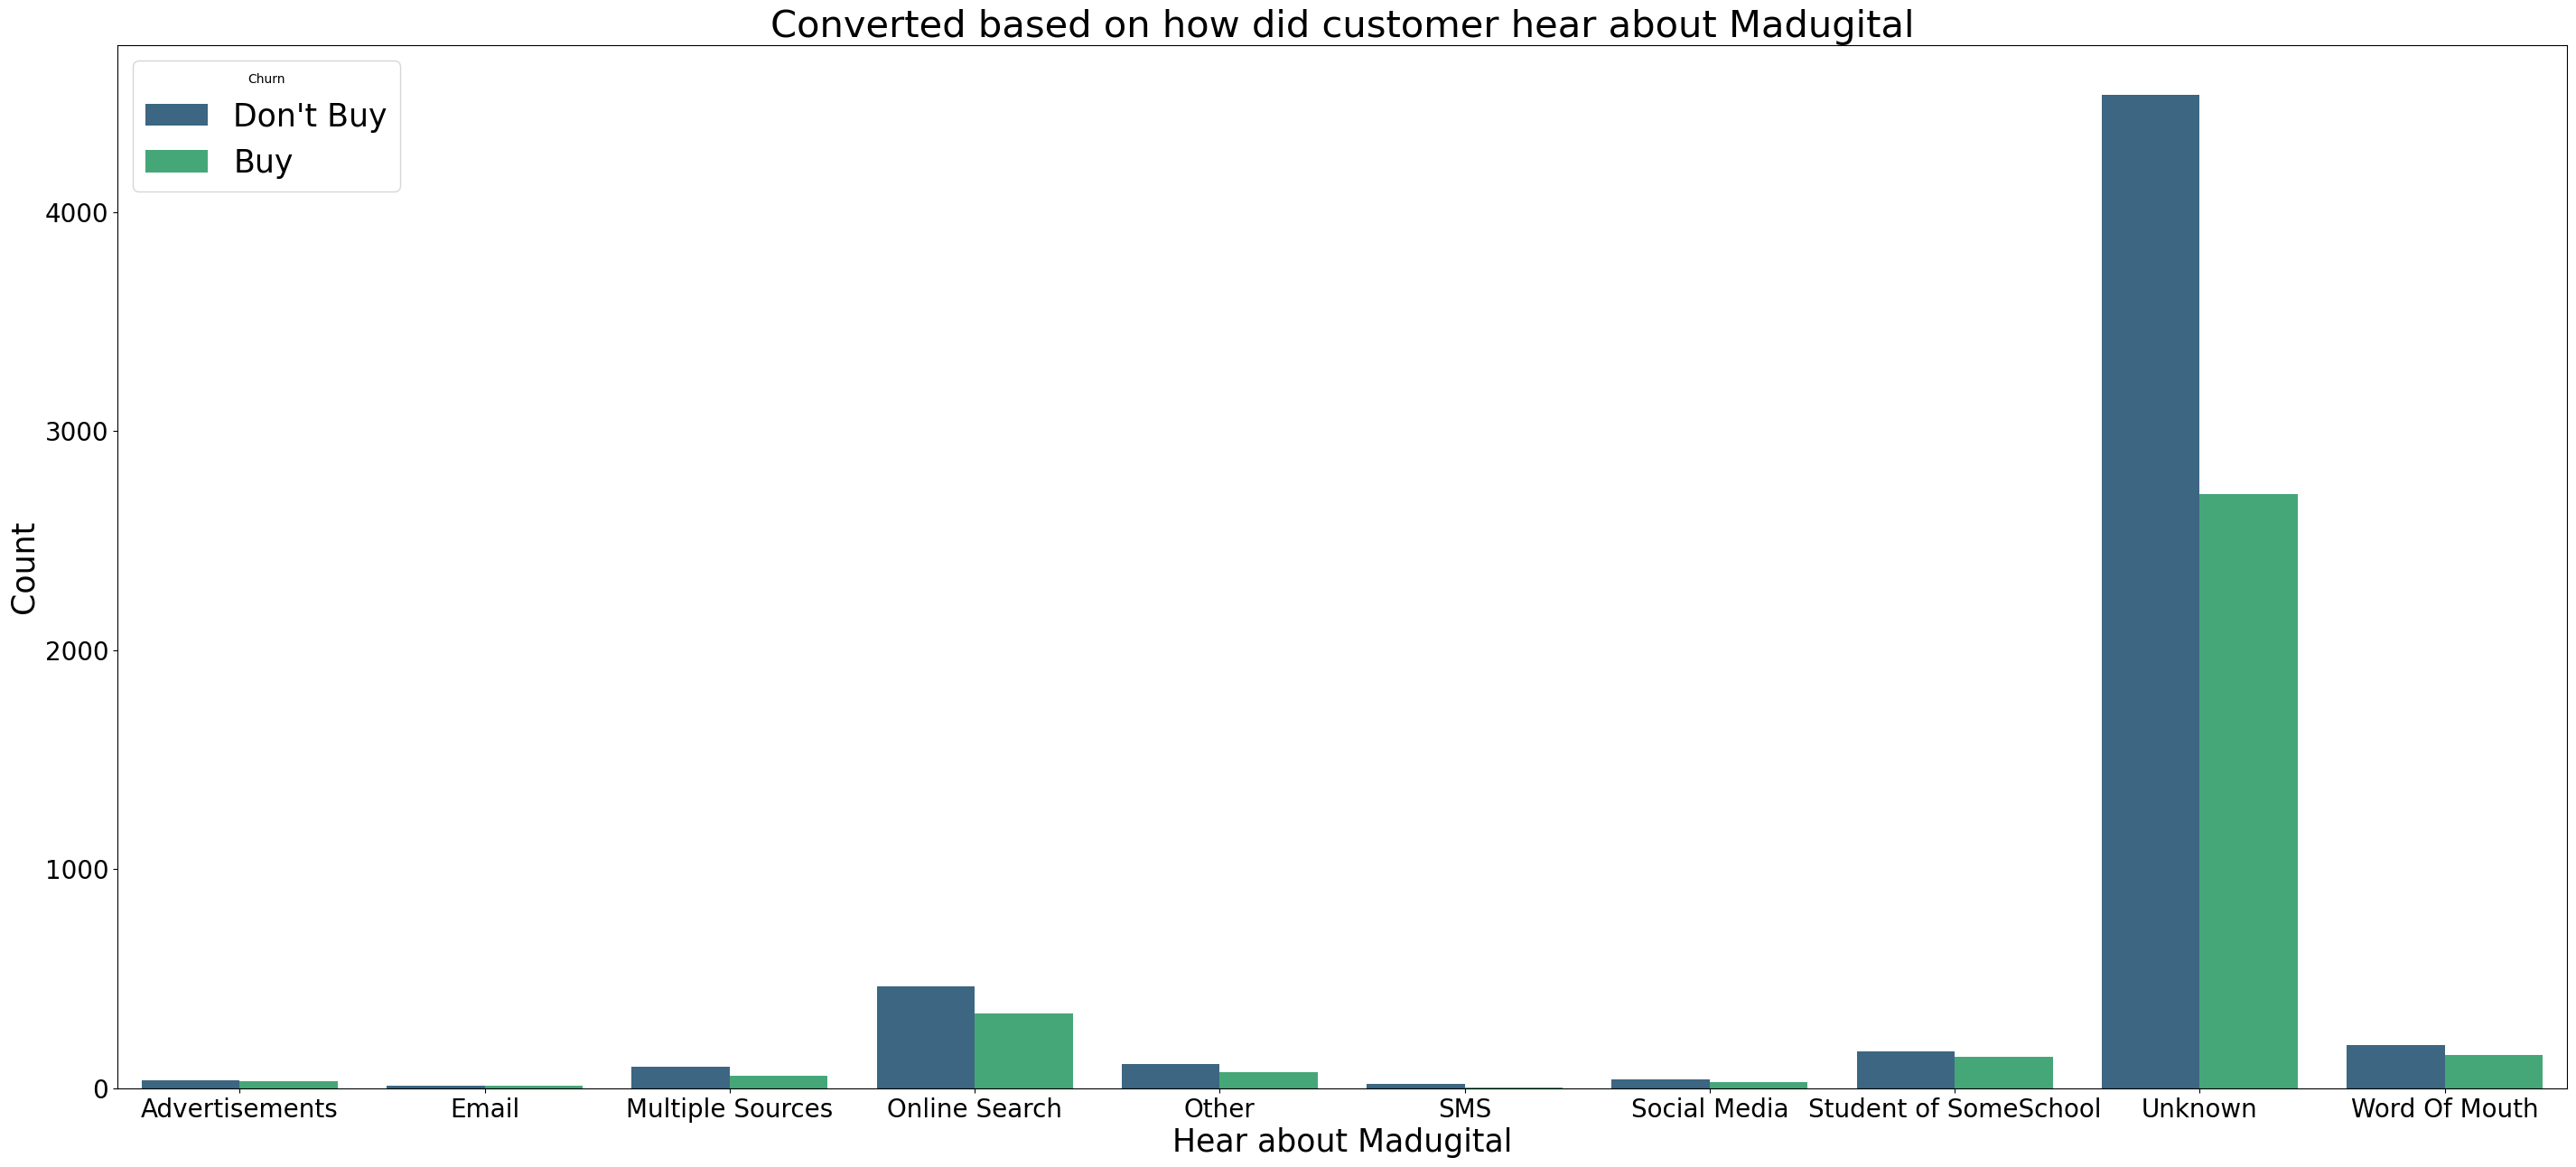

In [25]:
col='Hear about Madugital'

data1 = df_fill[df_fill["Converted"] == 0]
data2 = df_fill[df_fill["Converted"] == 1]

df1 = data1[col].value_counts().reset_index()
df1 = df1.rename(columns = {col : 'count', 'index' : col})
df1 = df1.sort_values(col)

df2 = data2[col].value_counts().reset_index()
df2 = df2.rename(columns = {col : 'count', 'index' : col})
df2 = df2.sort_values(col)


df1['hue']="Don't Buy"
df2['hue']="Buy"
combine=pd.concat([df1,df2])

plt.figure(figsize=(35, 15))
sns.barplot(x=col,y='count',data=combine,hue='hue', palette="viridis")
plt.title("Converted based on how did customer hear about Madugital", fontsize=30)
plt.legend(title='Converted', fontsize='25',loc ="upper left")
plt.ylabel('Count', fontsize=25)
plt.xlabel(col, fontsize=25)
plt.xticks(fontsize='20')
plt.yticks(fontsize='20')
plt.show()

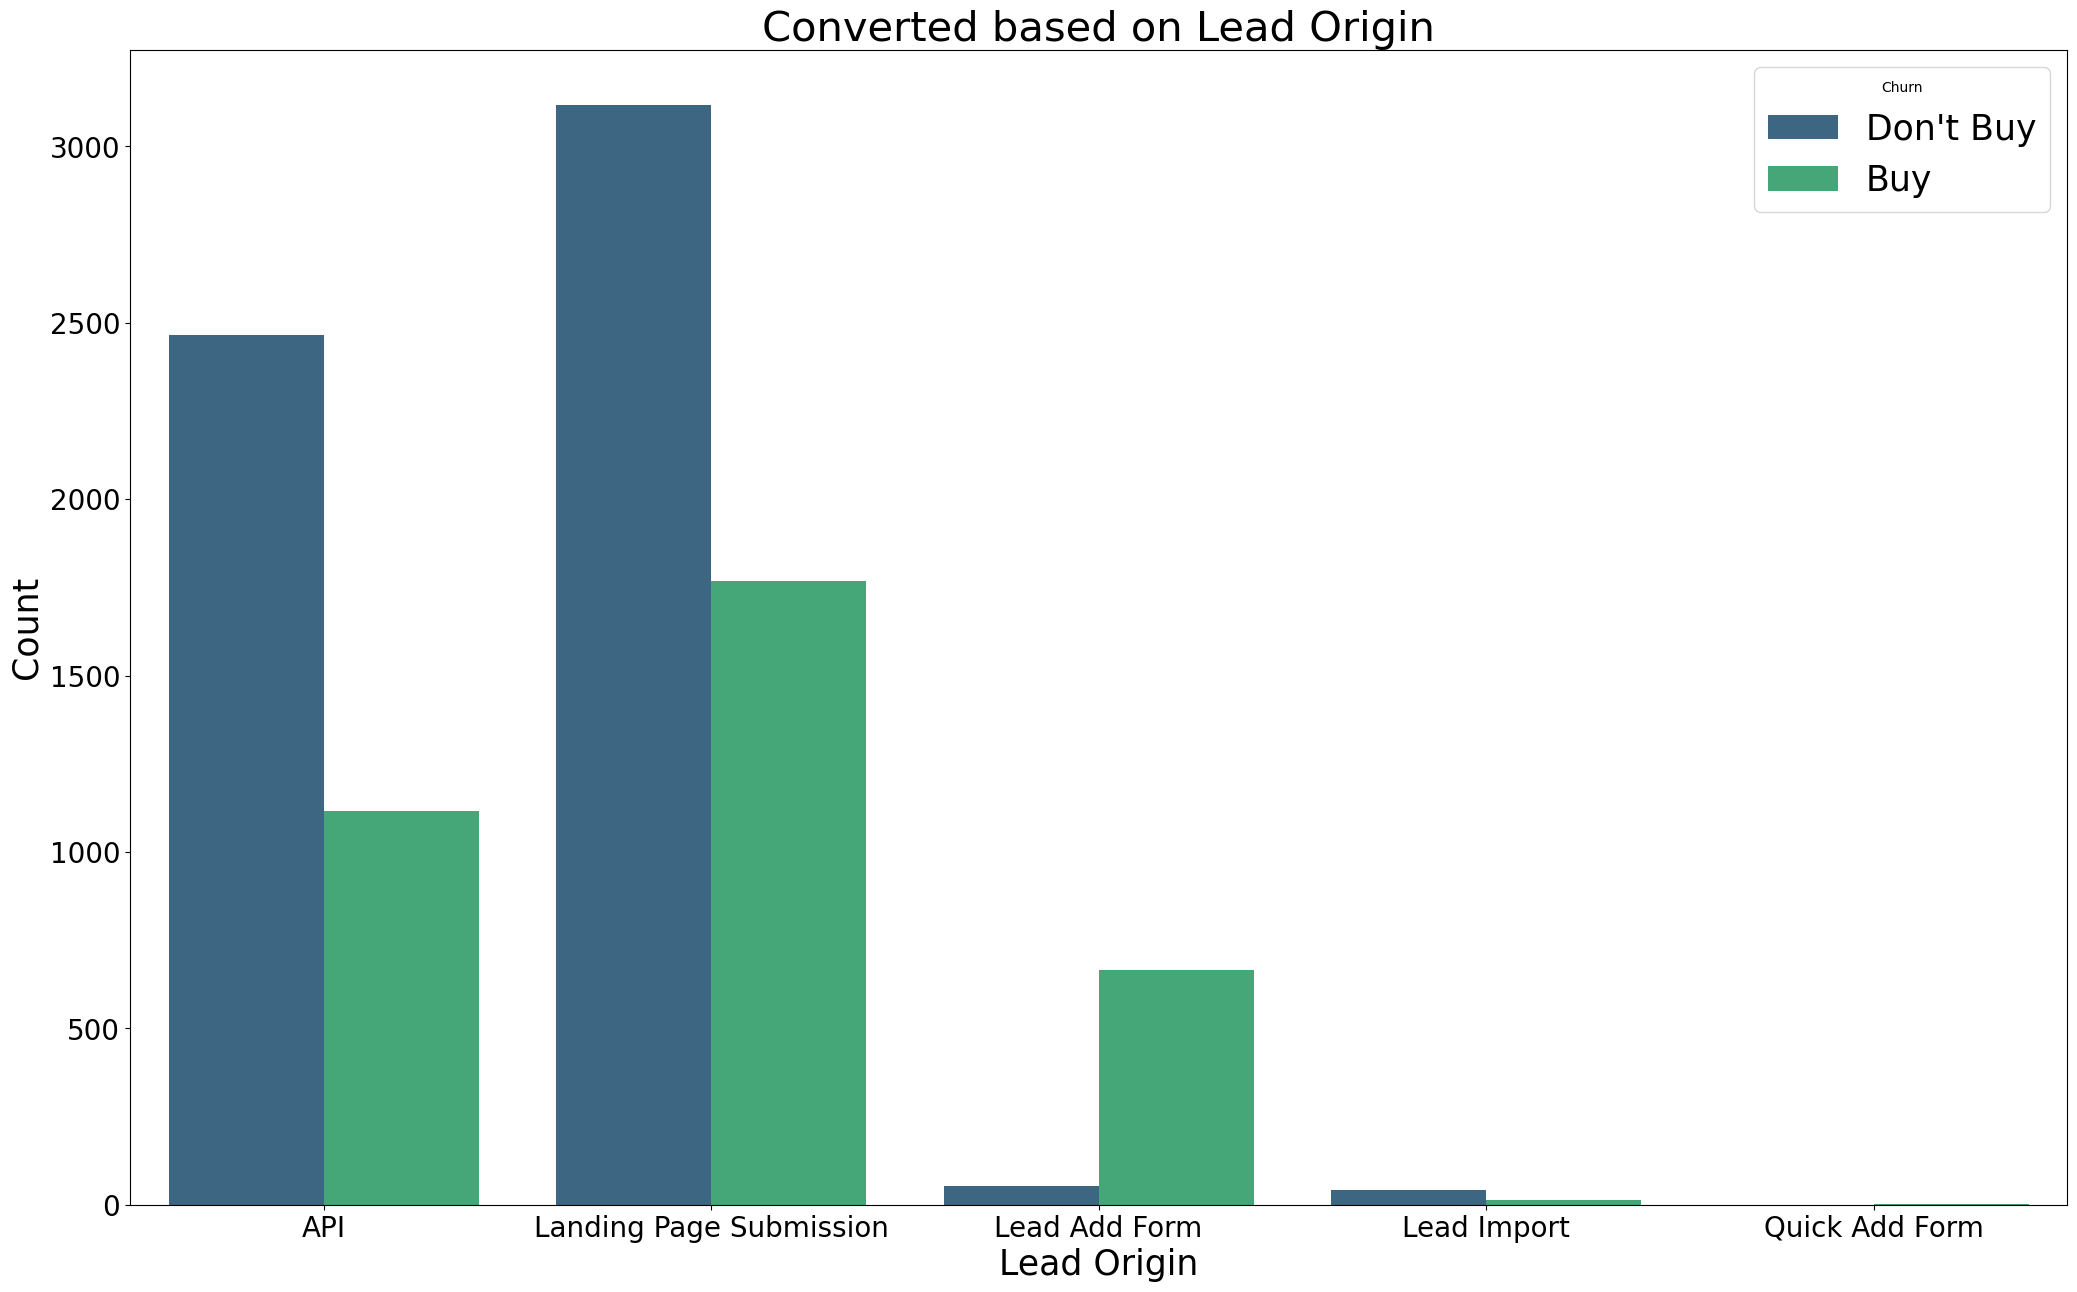

In [26]:
col='Lead Origin'

data1 = df_fill[df_fill["Converted"] == 0]
data2 = df_fill[df_fill["Converted"] == 1]

df1 = data1[col].value_counts().reset_index()
df1 = df1.rename(columns = {col : 'count', 'index' : col})
df1 = df1.sort_values(col)

df2 = data2[col].value_counts().reset_index()
df2 = df2.rename(columns = {col : 'count', 'index' : col})
df2 = df2.sort_values(col)

df1['hue']="Don't Buy"
df2['hue']="Buy"
combine=pd.concat([df1,df2])

plt.figure(figsize=(25, 15))
sns.barplot(x=col,y='count',data=combine,hue='hue', palette="viridis")
plt.title("Converted based on Lead Origin", fontsize=30)
plt.legend(title='Converted', fontsize='25',loc ="upper right")
plt.ylabel('Count', fontsize=25)
plt.xlabel(col, fontsize=25)
plt.xticks(fontsize='20')
plt.yticks(fontsize='20')
plt.show()

# 4. Modelling

Create dummies from the categorical features.

In [27]:
dummies=pd.get_dummies(df_fill[['Lead Source','Lead Origin','Country','Do Not Email', 'Do Not Call','Specialization',
                                'Hear about Madugital','Tags','Choosing Product','Current Occupation','Search',
                                'Newspaper Article', 'Madugital Telegram', 'Newspaper','Digital Advertisement',
                                'Recommendations','Lead Quality','Activity Index','Profile Index','Lead Profile',
                                'Last Notable Activity',]],drop_first=True)
dummies.head()

,Lead Source_Direct Traffic,Lead Source_Google,Lead Source_Live Chat,Lead Source_NC_EDM,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Pay per Click Ads,Lead Source_Press_Release,Lead Source_Reference,Lead Source_Referral Sites,...,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
0,0,0,0,0,1,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
1,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
4,0,1,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0


Join the dummies with the final data and drop the unnecessary variables from the final data

In [28]:
final_data=df_fill.join(dummies)

In [29]:
final_data.drop(['Lead Origin', 'Lead Source','Do Not Email', 'Do Not Call','Country', 'Specialization', 
                 'Hear about Madugital','Current Occupation','Choosing Product', 'Search','Newspaper Article', 
                 'Madugital Telegram', 'Newspaper','Digital Advertisement','Recommendations','Tags', 'Lead Quality',
                 'Lead Profile','Activity Index','Profile Index','Last Notable Activity'], axis = 1, inplace = True)

In [30]:
final_data.columns

Index(['Converted', 'Total Visits', 'Total Time', 'Page Views',
       'Activity Score', 'Profile Score', 'Lead Source_Direct Traffic',
       'Lead Source_Google', 'Lead Source_Live Chat', 'Lead Source_NC_EDM',
       ...
       'Last Notable Activity_Form Submitted on Website',
       'Last Notable Activity_Had a Phone Conversation',
       'Last Notable Activity_Modified',
       'Last Notable Activity_Olark Chat Conversation',
       'Last Notable Activity_Page Visited on Website',
       'Last Notable Activity_Resubscribed to emails',
       'Last Notable Activity_SMS Sent', 'Last Notable Activity_Unreachable',
       'Last Notable Activity_Unsubscribed',
       'Last Notable Activity_View in browser link Clicked'],
      dtype='object', length=166)

Define the x and y of the model and split the data using <code>train_test_split</code>.

In [31]:
x = final_data.drop(['Converted'],axis=1)
y = final_data['Converted']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=1)
x_train.shape, y_train.shape, x_test.shape, y_test.shape

((7392, 165), (7392,), (1848, 165), (1848,))

Start modelling the data.

### Decision Tree Classifier

In [32]:
dt=DecisionTreeClassifier(random_state=1)
dt.fit(x_train,y_train)

y_pred_dt = dt.predict(x_test)
cm_dt = confusion_matrix(y_test,y_pred_dt)

print("confusion matrics=",cm_dt)
print(classification_report(y_test,y_pred_dt))

confusion matrics= [[1049   70]
 [  53  676]]
              precision    recall  f1-score   support

           0       0.95      0.94      0.94      1119
           1       0.91      0.93      0.92       729

    accuracy                           0.93      1848
   macro avg       0.93      0.93      0.93      1848
weighted avg       0.93      0.93      0.93      1848



### Random Forest Classifier

In [33]:
rf = RandomForestClassifier(random_state=1)
rf.fit(x_train, y_train)

y_pred_rf = rf.predict(x_test)
cm_rf = confusion_matrix(y_test,y_pred_rf)

print("confusion matrics=",cm_rf)
print(classification_report(y_test,y_pred_rf))

confusion matrics= [[1086   33]
 [  49  680]]
              precision    recall  f1-score   support

           0       0.96      0.97      0.96      1119
           1       0.95      0.93      0.94       729

    accuracy                           0.96      1848
   macro avg       0.96      0.95      0.95      1848
weighted avg       0.96      0.96      0.96      1848



# 6. Evaluation

From the classification report we can say that Random Forest Classifier is the best method for predicting if customer is gonna buy a product or not. From the classification report we know that the accuracy is more than 95% so it's a good result but there's always room for improvement.

Here is the prediction result from the Random Forest Classifier

In [34]:
result = pd.DataFrame(y_test).join(pd.DataFrame(y_pred_rf).set_index(y_test.index))
result

,Converted,0
2140,1,1
7707,1,1
1522,1,1
1873,0,0
8100,1,1
...,...,...
1837,0,0
7173,0,0
634,0,0
4406,1,1
